# Classification & Logistic Regression

This notebook will require the following dataset:
- ```penguins.csv```

This dataset contains information about 3 species of penguins (Adelie, Gentoo, Chinstrap), recorded by the Palmer Station in Antarctica.  

We will train a logistic regression model to identify chinstrap penguins.

In [19]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('penguins.csv', index_col = 0)
df

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
331,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


### 1. Compute (and display) the number of each species in the dataset. Is this a balanced or imbalanced dataset?


In [20]:
df[['species_short']].value_counts()

species_short
Adelie           146
Gentoo           119
Chinstrap         68
dtype: int64

Answer: 

This is an imbalanced dataset as it contains uneven proportions of the 3 species. 

### 2. Use seaborn's ```pairplot``` to visualize the distribution of features across species. Based on the plot, answer questions 2(a), 2(b) and 2(c) below.


Note: pairplot will only display numerical features; that's ok.

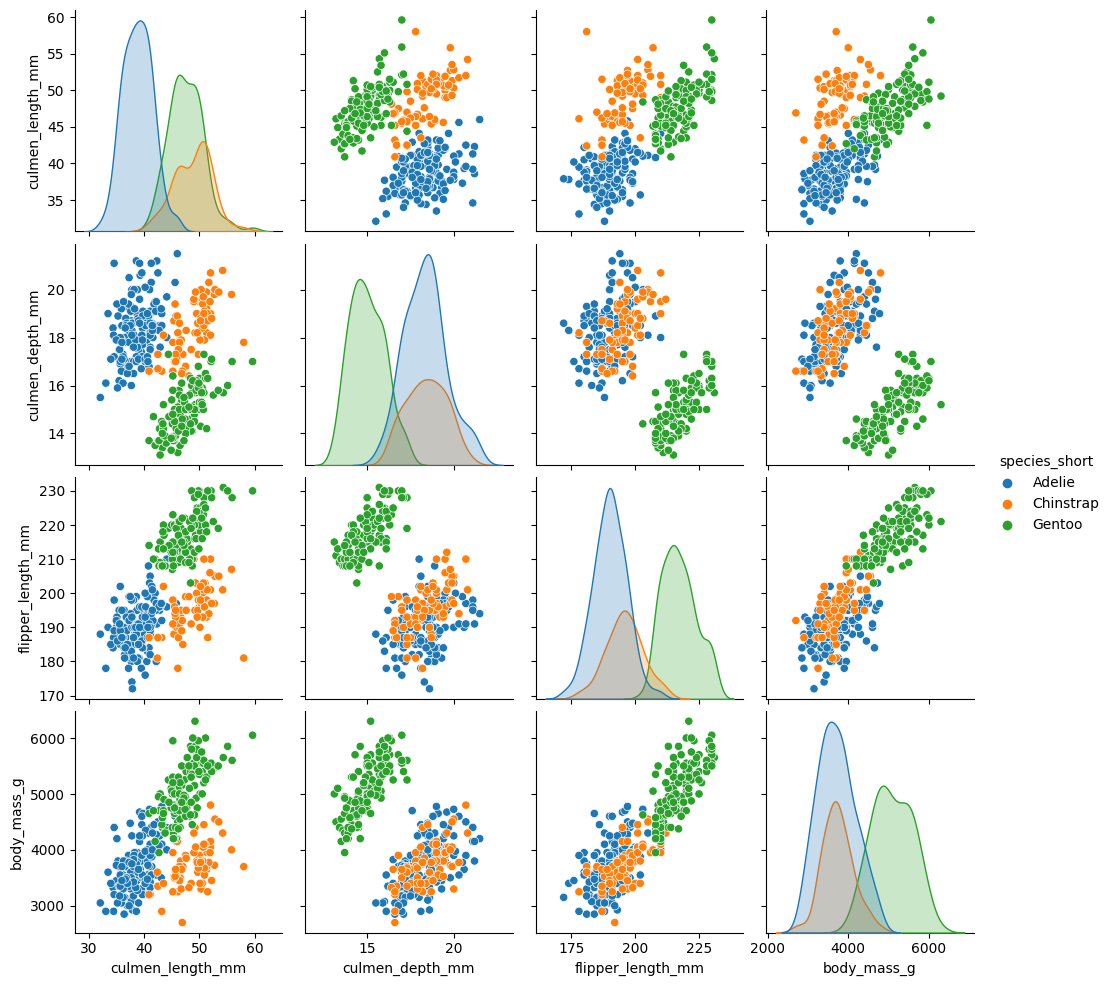

In [21]:
sns.pairplot(df, hue = 'species_short')

#### 2(a). Is there a _single_ feature that distinguishes _gentoo_ penguins from the rest? If so, what feature would you use? If not, explain why not.

Answer: 

Yes. I would use culmen_depth to distinguish gentoo penguins from the rest.

#### 2(b). Is there a _single_ feature that distinguishes _chinstrap_ penguins from the rest?  If so, what feature would you use? If not, explain why not.

Answer: 

No. There's no line that can well separate orange dots (which represent Chinstrap penguins) from the rest on any pairplot graph. 

#### 2(c). Which 2 features would you use to distinguish chinstrap penguins from the rest?


Answer: 

I would use culmen_length and body_mass to distinguish Chinstrap penguins from the rest. 

--- 

We will train logistic regression models on this data, and evaluate the performance. 

Throughout, we will set the target ```y``` to be ```True``` for chinstrap and ```False``` for others.

In [54]:
y = df['species_short'] == 'Chinstrap'
y

0      False
1      False
2      False
3      False
4      False
       ...  
328    False
329    False
330    False
331    False
332    False
Name: species_short, Length: 333, dtype: bool

### 3. Create (and display) a DataFrame ```X``` with just the 2 features that you selected in 2(c).


In [55]:
X = df[['culmen_length_mm', 'body_mass_g']]
X

,culmen_length_mm,body_mass_g
0,39.1,3750
1,39.5,3800
2,40.3,3250
3,36.7,3450
4,39.3,3650
...,...,...
328,47.2,4925
329,46.8,4850
330,50.4,5750
331,45.2,5200


### 4. Make a pipeline consisting of a Standard Scaler followed by Logistic Regression. 


For logistic regression, set the ```penalty``` parameter to ```'none'``` (this will give "ordinary" logistic regression, i.e. the un-regularized version).

In [56]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

log = make_pipeline(StandardScaler(), LogisticRegression(penalty = 'none'))

### 5. Make a cross-validator to do stratified 5-fold cross-validation.


Make sure to set ```shuffle``` to ```True```. You may use ```2022``` as your random state.

In [57]:
from sklearn.model_selection import StratifiedKFold 

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2022) 

### 6. Create a cross-validator using  ```cross_validate```


Make use of the following:
- X and y from above
- Your pipeline created above
- Your cross validator created above
- For scoring, use balanced accuracy, precision, recall and F1

Refer to this table for the appropriate strings to specify your scoring functions: 
https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules

Store the validator in a variable called ```cv_results```, then run the cell after that to display the results as a DataFrame.

In [58]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(log, X, y, scoring = ['balanced_accuracy', 'precision', 'recall', 'f1'], cv = cv)
cv_results

{'fit_time': array([0.01194811, 0.00273895, 0.00266886, 0.00303721, 0.00257516]),
 'score_time': array([0.00250697, 0.00184274, 0.00182819, 0.00185084, 0.00178695]),
 'test_balanced_accuracy': array([1.        , 0.96226415, 0.92857143, 0.96153846, 0.96153846]),
 'test_precision': array([1.        , 0.77777778, 1.        , 1.        , 1.        ]),
 'test_recall': array([1.        , 1.        , 0.85714286, 0.92307692, 0.92307692]),
 'test_f1': array([1.        , 0.875     , 0.92307692, 0.96      , 0.96      ])}

In [59]:
pd.DataFrame(cv_results)

,fit_time,score_time,test_balanced_accuracy,test_precision,test_recall,test_f1
0,0.011948,0.002507,1.000000,1.000000,1.000000,1.000000
1,0.002739,0.001843,0.962264,0.777778,1.000000,0.875000
2,0.002669,0.001828,0.928571,1.000000,0.857143,0.923077
3,0.003037,0.001851,0.961538,1.000000,0.923077,0.960000
4,0.002575,0.001787,0.961538,1.000000,0.923077,0.960000


In [60]:
# An additional step to take average scoring across the 5-folds for comparison in question 9 later
pd.DataFrame(cv_results).mean()

fit_time                  0.004594
score_time                0.001963
test_balanced_accuracy    0.962783
test_precision            0.955556
test_recall               0.940659
test_f1                   0.943615
dtype: float64

### 7. Now define ```X_single```, consisting of just ```culmen_length_mm```. Cross validate with ```X_single``` instead of ```X```, and display your results.


In [61]:
X_single = df[['culmen_length_mm']]

cv_results = cross_validate(log, X_single, y, scoring = ['balanced_accuracy', 'precision', 'recall', 'f1'], cv = cv)

pd.DataFrame(cv_results)

,fit_time,score_time,test_balanced_accuracy,test_precision,test_recall,test_f1
0,0.008372,0.004160,0.605121,0.500000,0.285714,0.363636
1,0.002814,0.002261,0.559973,0.375000,0.214286,0.272727
2,0.002350,0.002018,0.607143,1.000000,0.214286,0.352941
3,0.002260,0.001606,0.576923,1.000000,0.153846,0.266667
4,0.001204,0.001065,0.625544,0.571429,0.307692,0.400000


In [62]:
# An additional step to take average scoring across the 5-folds for comparison in question 9 later
pd.DataFrame(cv_results).mean()

fit_time                  0.003400
score_time                0.002222
test_balanced_accuracy    0.594941
test_precision            0.689286
test_recall               0.235165
test_f1                   0.331194
dtype: float64

### 8. Finally, define ```X_all``` consisting of all 4 numerical features. Cross validate with ```X_all``` instead of ```X```, and display your results.


In [63]:
X_all = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

cv_results = cross_validate(log, X_all, y, scoring = ['balanced_accuracy', 'precision', 'recall', 'f1'], cv = cv)

pd.DataFrame(cv_results)

,fit_time,score_time,test_balanced_accuracy,test_precision,test_recall,test_f1
0,0.009975,0.002491,1.000000,1.000000,1.000000,1.000000
1,0.003452,0.002633,0.952830,0.736842,1.000000,0.848485
2,0.003904,0.002217,0.928571,1.000000,0.857143,0.923077
3,0.003861,0.002244,0.961538,1.000000,0.923077,0.960000
4,0.003394,0.002070,0.961538,1.000000,0.923077,0.960000


In [64]:
# An additional step to take average scoring across the 5-folds for comparison in question 9 later
pd.DataFrame(cv_results).mean()

fit_time                  0.004917
score_time                0.002331
test_balanced_accuracy    0.960896
test_precision            0.947368
test_recall               0.940659
test_f1                   0.938312
dtype: float64

### 9. Compare and comment on the validation results using ```X```, ```X_single``` and ```X_all```. Do these agree with your observations in question 2? Which is the best model?


Answer: 

Comparing the averages of balanced_accuracy, precision, recall and F1 scores obtained from using the 3 sets of features, average scores from using "X" are comparable to those from using "X_all", and both are much better than those from using "X_single". This implies that when using logistic regression model, culmen_length & body_mass features together do a better job than culmen_length alone in distinguishing Chinstrap penguins from the rest. Furthermore, using culmen_length & body_mass features to distinguish Chinstrap penguins is just as good as using all 4 features.   

This agrees with my observations in question 2. 

The best model is using culmen_length & body_mass as features in logistic regression to identify Chinstrap penguins.

### 10. Do a train-test split on ```X_single``` and ```y```, with a test size of 20% and random state 2022. Train your pipeline, then compute (and display) a confusion matrix. Based on the confusion matrix, compute the balanced accuracy, precision and recall.



Tip: If you want your confusion matrix to have the positive class at the top right, you can add ```labels = [True, False]``` when calling ```confusion_matrix```.

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# stratify by y due to uneven proportions of 3 species
X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.20, random_state=2022, stratify = y)

log.fit(X_train, y_train)
y_pred = log.predict(X_test)

confusion_matrix(y_test, y_pred, labels = [True, False]) 

array([[ 4, 10],
       [ 3, 50]])

Balanced accuracy:

In [66]:
(4/(4+10)+50/(50+3))/2

0.6145552560646901

Precision:

In [67]:
4/(4+3)

0.5714285714285714

Recall:

In [68]:
4/(4+10)

0.2857142857142857

In [69]:
# to verify the answers by a classification report
print(classification_report(y_test, y_pred, labels = [True, False])) 

              precision    recall  f1-score   support

        True       0.57      0.29      0.38        14
       False       0.83      0.94      0.88        53

    accuracy                           0.81        67
   macro avg       0.70      0.61      0.63        67
weighted avg       0.78      0.81      0.78        67

